In [15]:
#!/usr/bin/python

import os
import math
import struct
import re
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

### REFERENCES
# https://docs.python.org/2/library/struct.html
# http://stackoverflow.com/questions/1163459/reading-integers-from-binary-file-in-python
# http://matplotlib.org/examples/pylab_examples/subplots_demo.html
# http://stackoverflow.com/questions/18704353/correcting-matplotlib-colorbar-ticks

# temperature function
def get_temp(val):
    #temp = (int(val)-7000)/15 #fahrenheit
    temp = (((int(val)-7000)/15)-32)*(5./9)+5 #celcius
    return str(round(temp))

# takes a raw thermography file and plots it
def temp_plot(filename):
    
    # open up the file and dump the first two words
    fin = open(filename,"rb")
    highval = struct.unpack('H', fin.read(2))
    lowval = struct.unpack('H', fin.read(2))
    
    # dump the 80x60 thermography data into a list
    a = []
    while True:
        try: a.append(struct.unpack('H', fin.read(2)))
        except: break

    # get thermography data into a 2D array
    b = np.zeros([60,80])
    for i in range(0,len(a)):
        # print([int(math.floor(i/80)), i%80])
        b[int(math.floor(i/80))][i%80] = ''.join(str(a[i])[1:-2])


    # set some bounds for my colormapping
    tmin = 7900
    tmax = 10015

    # plot my colormapped data
    fig1 = plt.figure()
    plt1 = plt.subplot(1,1,1)
    img = plt1.imshow(b,interpolation='none',cmap=plt.cm.gnuplot)
    #img = plt1.imshow(b,interpolation='none',cmap=plt.cm.gnuplot,vmin=tmin,vmax=tmax)

    # make a color bar
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colorbar
    # http://pyhogs.github.io/colormap-examples.html
    # http://stackoverflow.com/questions/7875688/how-can-i-create-a-standard-colorbar-for-a-series-of-plots-in-python
    ttick = (tmax-tmin)/14
    ticks = range(tmin,tmax,ttick)
    cb = plt.colorbar(img,cmap=plt.cm.gnuplot)
    #cb.set_clim(vmin=tmin,vmax=tmax)
    cb.set_ticks(ticks)
    cb.set_ticklabels([get_temp(val) for val in ticks])
    #cb.update_ticks()

    # save the current figure
    #fig1.savefig(str(filename)+'.png')
    #plt.close()
    plt.show()



/ctrl/data/exp/in/thermograph/thermograph_2016-12-15T15:53:45.bin


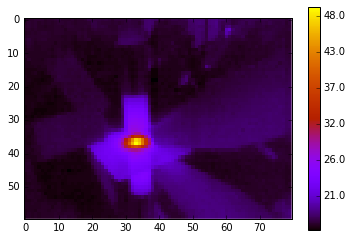

In [17]:
%matplotlib inline
stem = '/ctrl/data/exp/in/thermograph'
fol = ''

datas = sorted(os.listdir(stem+fol))
# print datas
# for data in datas:
#     if ((len(re.findall('.bin', data)) != 0) & (len(re.findall('.bin.', data)) == 0)):
#         print(data)
#         #temp_plot(fol+data)
latest = os.path.join(stem,datas[-1])
print(latest)
temp_plot(latest)